# 1. Read file .csv using pandas

In [25]:

import pandas as pd

df = pd.read_csv('student.csv')

print(df.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

# 2. Get X and Y

In [26]:
X = df.drop("Target", axis=1)

Y = df["Target"]

print(X.shape)
print(Y.shape)

(4424, 36)
(4424,)


# 3. Remove data containing text
 - Coerce all X to numeric form, if error then NaN
 - Fill NaN with the average of each column

In [40]:
X = X.apply(pd.to_numeric, errors="coerce")
X = X.fillna(X.mean())


# 4. Train test split
## data sharing 70% train, 30% test


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, 
    test_size=0.3,       # 30% cho test
    random_state=42,     # để tái lập kết quả
    stratify=Y           # keep the ratio Dropout/Graduate same original
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


X_train: (3096, 36)
X_test : (1328, 36)
y_train: (3096,)
y_test : (1328,)


# 5. data standard

In [29]:
from sklearn.preprocessing import StandardScaler

# Tạo bộ chuẩn hoá
scaler = StandardScaler()

# Fit trên train và biến đổi
X_train_scaled = scaler.fit_transform(X_train)

# Chỉ transform trên test (không fit lại!)
X_test_scaled = scaler.transform(X_test)


# Traing model Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình
model = LogisticRegression(
    solver="lbfgs",   # thuật toán tối ưu
    max_iter=1000,    # số vòng lặp tối đa
    tol=1e-4          # ngưỡng hội tụ
)

# Huấn luyện trên dữ liệu train đã chuẩn hoá
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# Results evaluation   

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dự đoán nhãn
y_pred = model.predict(X_test_scaled)

# Độ chính xác
print("Accuracy:", accuracy_score(y_test, y_pred))

# Báo cáo chi tiết Precision/Recall/F1
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7658132530120482

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.79      0.75      0.77       427
    Enrolled       0.54      0.35      0.42       238
    Graduate       0.80      0.92      0.86       663

    accuracy                           0.77      1328
   macro avg       0.71      0.68      0.68      1328
weighted avg       0.75      0.77      0.75      1328


Confusion Matrix:
[[322  41  64]
 [ 64  83  91]
 [ 21  30 612]]


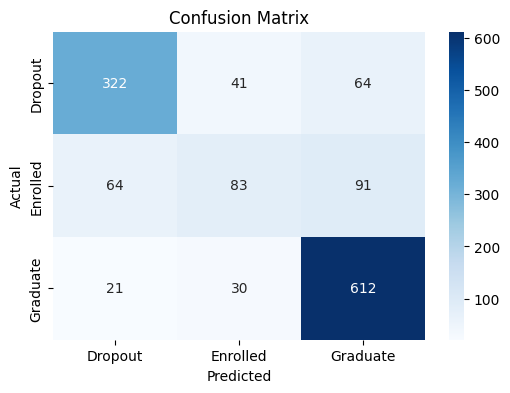

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Feature importance

d:\Scr-AIR\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


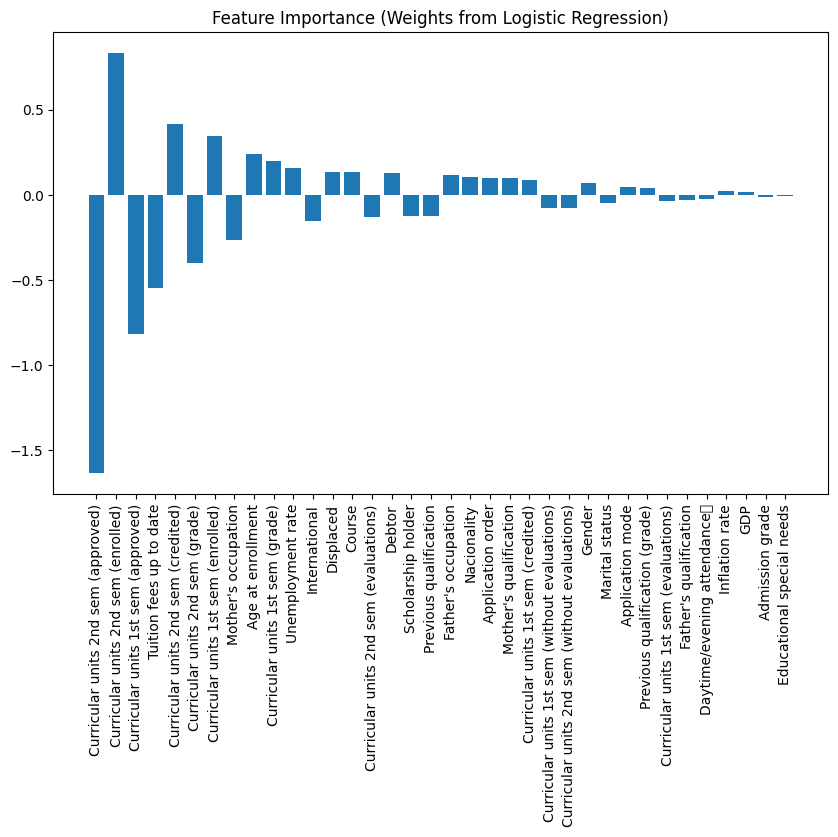

In [36]:
import numpy as np

# Lấy trọng số (coef_) từ model
importance = model.coef_[0]

# Sắp xếp theo độ lớn
indices = np.argsort(np.abs(importance))[::-1]

# Vẽ bar chart
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importance[indices])
plt.xticks(range(len(indices)), X.columns[indices], rotation=90)
plt.title("Feature Importance (Weights from Logistic Regression)")
plt.show()
